In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [5]:
data = {}
for tp in range(4):
    data[tp+1]  = pd.read_csv(f'datos\counted\d{tp+1}_counted.csv', index_col=0)

In [6]:
data[1].columns

Index(['avisoid', 'empresaid', 'avisofechapublicacion', 'avisovacante',
       'mostrarsueldo', 'avisoexperiencia', 'expiracion', 'dias',
       'avisorepublicacion', 'avisocargo', 'areanombre',
       'actividadempresanombre', 'avisocuerpo', 'disponibilidadnombre',
       'avisoduracioncont', 'avisolugartrabajo', 'gradoescolarnombre',
       'situacionestudios', 'avisorequisitos', 'carreras', 'estado',
       'endpagado_o_gratuito', 'nivelnombre', 'carreras_array',
       'sueldoestimado', '_merge', 'avcu_b1', 'avca_b1', 'avre_b1', 'avcu_b2',
       'avca_b2', 'avre_b2', 'avcu_b3', 'avca_b3', 'avre_b3', 'avcu_b4',
       'avca_b4', 'avre_b4', 'teletrabajo_', 'bucket1', 'bucket2', 'bucket3',
       'bucket4', 'wfh', 'duplicates_avisocuerpo', 'duplicates_avisocargo',
       'similars', 'pseudoindex'],
      dtype='object')

Dates

In [7]:
dates = np.concatenate((data[1]['avisofechapublicacion'].unique(), data[2]['avisofechapublicacion'].unique(), 
                        data[3]['avisofechapublicacion'].unique(), data[4]['avisofechapublicacion'].unique()), axis=0)

In [49]:
duplicates_avisocuerpo = pd.concat([data[1][['avisofechapublicacion', 'duplicates_avisocuerpo', 'avisoid']], data[2][['avisofechapublicacion', 'duplicates_avisocuerpo', 'avisoid']],
                                    data[3][['avisofechapublicacion', 'duplicates_avisocuerpo', 'avisoid']], data[4][['avisofechapublicacion', 'duplicates_avisocuerpo', 'avisoid']]], axis=0, ignore_index=True)

In [50]:
duplicates_avisocargo = pd.concat([data[1][['avisofechapublicacion', 'duplicates_avisocargo', 'avisoid']], data[2][['avisofechapublicacion', 'duplicates_avisocargo', 'avisoid']],
                                    data[3][['avisofechapublicacion', 'duplicates_avisocargo', 'avisoid']], data[4][['avisofechapublicacion', 'duplicates_avisocargo', 'avisoid']]], axis=0, ignore_index=True)

In [51]:
duplicates_avisocuerpo['avisofechapublicacion'] = pd.to_datetime(duplicates_avisocuerpo['avisofechapublicacion'])
duplicates_avisocargo['avisofechapublicacion'] = pd.to_datetime(duplicates_avisocargo['avisofechapublicacion'])

In [52]:
duplicates_avisocuerpo.set_index('avisofechapublicacion', inplace=True)
duplicates_avisocargo.set_index('avisofechapublicacion', inplace=True)

In [59]:
trimester_sum_avisocuerpo = duplicates_avisocuerpo.resample('3M')['duplicates_avisocuerpo'].sum().reset_index()
trimester_count_avisocuerpo = duplicates_avisocuerpo.resample('3M')['avisoid'].count().reset_index()

trimester_sum_avisocargo = duplicates_avisocargo.resample('3M')['duplicates_avisocargo'].sum().reset_index()
trimester_count_avisocargo = duplicates_avisocargo.resample('3M')['avisoid'].count().reset_index()

In [63]:
trimester_sum_avisocuerpo['ratio'] = trimester_sum_avisocuerpo['duplicates_avisocuerpo']/trimester_count_avisocuerpo['avisoid']
trimester_sum_avisocargo['ratio'] = trimester_sum_avisocargo['duplicates_avisocargo']/trimester_count_avisocargo['avisoid']

In [65]:
trimester_sum_avisocargo

,avisofechapublicacion,duplicates_avisocargo,ratio
0,2008-01-31,6,0.000521
1,2008-04-30,3866,0.113289
2,2008-07-31,3618,0.103656
3,2008-10-31,2757,0.078493
4,2009-01-31,1634,0.059770
...,...,...,...
59,2022-10-31,11460,0.174193
60,2023-01-31,14998,0.213152
61,2023-04-30,9157,0.173094
62,2023-07-31,8509,0.163944


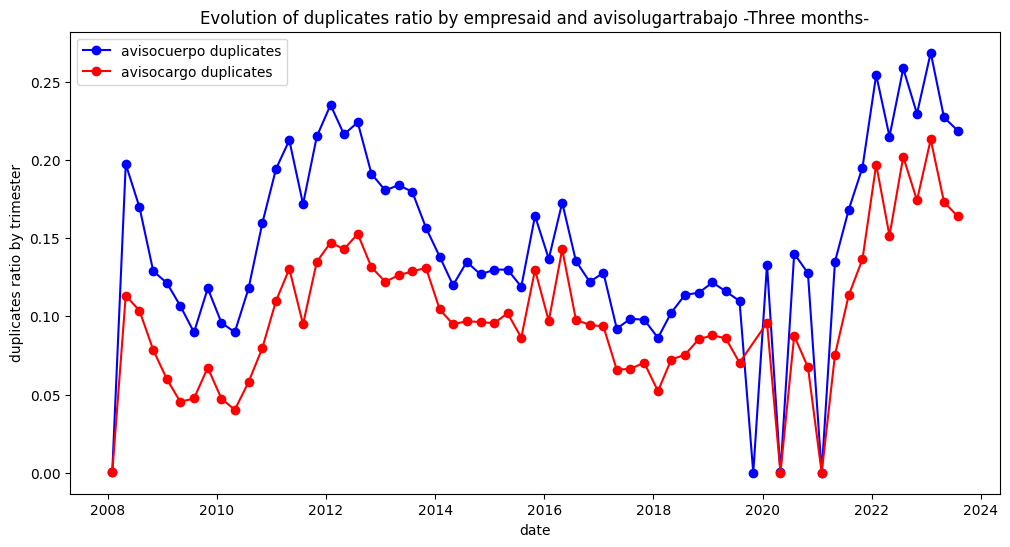

In [72]:
filtered_avisocuerpo = trimester_sum_avisocuerpo[trimester_sum_avisocuerpo['ratio'] > 0]
filtered_avisocargo = trimester_sum_avisocargo[trimester_sum_avisocargo['ratio'] > 0]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_avisocuerpo['avisofechapublicacion'], filtered_avisocuerpo['ratio'], marker='o', linestyle='-', color='b', label='avisocuerpo duplicates')
plt.plot(filtered_avisocargo['avisofechapublicacion'], filtered_avisocargo['ratio'], marker='o', linestyle='-', color='r', label='avisocargo duplicates')
plt.title('Evolution of duplicates ratio by empresaid and avisolugartrabajo -Three months-')
plt.xlabel('date')
plt.ylabel('duplicates ratio by trimester')
plt.grid(False)
plt.legend()
plt.show()

